# 📊 Analyse Big Data – Consommation Mobile des Clients Orange


Ce notebook vous guide dans l’analyse d’un jeu de données fictif représentant des clients Orange au Cameroun.

📁 Dataset : `dataset_clients_orange.csv`

Chaque ligne représente un client avec des informations sur sa consommation téléphonique et internet.

## 🎯 Objectifs
1. Explorer les données
2. Visualiser les comportements de consommation
3. Réaliser un clustering (KMeans)
4. Interpréter les résultats et proposer des recommandations


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')



## 📥 Chargement du Dataset

In [20]:
df = pd.read_csv("dataset_clients_orange.csv")
df.head()


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654


## 🔍 Analyse exploratoire

In [25]:
# Affichage enrichi des premières lignes
print(" APERÇU DU DATASET")
print("-"*30)
print(f" Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print("\n Premiers enregistrements :")
display(df.head())

# Informations générales

print("\n INFORMATIONS GÉNÉRALES")
print("-"*30)
df.info()

# Variables numériques vs catégorielles
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nVariables numériques ({len(numeric_cols)}) : {numeric_cols}")
print(f"Variables catégorielles ({len(categorical_cols)}) : {categorical_cols}")

# Contrôle de la qualité des données

print("\n CONTRÔLE QUALITÉ")
print("-"*30)

# Valeurs manquantes
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print(" Valeurs manquantes :")
missing_summary = pd.DataFrame({
    'Valeurs_manquantes': missing_data,
    'Pourcentage': missing_percent.round(1)
})
print(missing_summary[missing_summary['Valeurs_manquantes'] > 0])

if missing_data.sum() == 0:
    print(" Aucune valeur manquante !")

# Doublons
duplicates = df.duplicated().sum()
print(f"\n Doublons : {duplicates}")
if duplicates == 0:
    print(" Aucun doublon détecté !")

# Unicité des IDs
unique_ids = df['client_id'].nunique()
print(f"\n Client IDs uniques : {unique_ids}/{len(df)}")
if unique_ids == len(df):
    print(" Tous les client_id sont uniques !")

# Statistiques descriptives

print("\nSTATISTIQUES DESCRIPTIVES")
print("-"*40)

# Statistiques de base
stats_desc = df.describe().round(2)
display(stats_desc)

# Ajout d'analyses spécifiques par variable
print("\nINSIGHTS CLÉS :")

# Age des clients
age_stats = df['age'].describe()
print(f"\nPROFIL CLIENTS (ÂGE) :")
print(f"• Âge moyen : {age_stats['mean']:.1f} ans")
print(f"• Âge médian : {age_stats['50%']:.1f} ans")
print(f"• Plus jeune : {age_stats['min']:.0f} ans | Plus âgé : {age_stats['max']:.0f} ans")
print(f"• Écart-type : {age_stats['std']:.1f} ans")

# Consommation DATA
data_stats = df['data_mo'].describe()
print(f"\n CONSOMMATION DATA :")
print(f"• Consommation moyenne : {data_stats['mean']:.0f} Mo ({data_stats['mean']/1024:.1f} Go)")
print(f"• Consommation médiane : {data_stats['50%']:.0f} Mo")
print(f"• Minimum : {data_stats['min']:.0f} Mo | Maximum : {data_stats['max']:.0f} Mo")

# Factures
facture_stats = df['montant_facture'].describe()
print(f"\n FACTURATION :")
print(f"• Facture moyenne : {facture_stats['mean']:.0f} FCFA")
print(f"• Facture médiane : {facture_stats['50%']:.0f} FCFA")
print(f"• Facture min : {facture_stats['min']:.0f} FCFA | max : {facture_stats['max']:.0f} FCFA")

# SMS envoyés
sms_stats = df['sms_envoyes'].describe()
print(f"\n COMMUNICATION - SMS :")
print(f"• SMS moyens envoyés : {sms_stats['mean']:.0f}")
print(f"• Médiane : {sms_stats['50%']:.0f} SMS")
print(f"• Min : {sms_stats['min']:.0f} | Max : {sms_stats['max']:.0f}")
print(f"• Écart-type : {sms_stats['std']:.1f} SMS")

# Temps d’appel
appel_stats = df['appels_min'].describe()
print(f"\n COMMUNICATION - TEMPS D’APPEL :")
print(f"• Durée moyenne : {appel_stats['mean']:.1f} minutes")
print(f"• Médiane : {appel_stats['50%']:.1f} minutes")
print(f"• Minimum : {appel_stats['min']:.0f} minutes | Maximum : {appel_stats['max']:.0f} minutes")
print(f"• Écart-type : {appel_stats['std']:.1f} minutes")

#  Analyse des variables catégorielles
print("\nVARIABLES CATÉGORIELLES")
print("-"*40)

# Types de forfait (code fourni enrichi)
print("ÉPARTITION PAR TYPE DE FORFAIT :")
forfait_counts = df['forfait_type'].value_counts()
forfait_percent = df['forfait_type'].value_counts(normalize=True) * 100

forfait_summary = pd.DataFrame({
    'Effectif': forfait_counts,
    'Pourcentage': forfait_percent.round(1)
})
display(forfait_summary)

# Insight business
dominant_forfait = forfait_counts.index[0]
dominant_pct = forfait_percent.iloc[0]
print(f" Insight : {dominant_pct:.1f}% des clients sont en {dominant_forfait}")

# Régions (code fourni enrichi)
print("\nRÉPARTITION GÉOGRAPHIQUE :")
region_counts = df['region'].value_counts()
region_percent = df['region'].value_counts(normalize=True) * 100

region_summary = pd.DataFrame({
    'Effectif': region_counts,
    'Pourcentage': region_percent.round(1)
})
display(region_summary)

# Insight géographique
dominant_region = region_counts.index[0]
weakest_region = region_counts.index[-1]
print(f" Insight : {dominant_region} domine ({region_percent.iloc[0]:.1f}%), {weakest_region} sous-représenté ({region_percent.iloc[-1]:.1f}%)")

# Analyse croisée par segments

print("\n ANALYSE PAR SEGMENTS")
print("-"*40)

# Consommation par type de forfait
print(" PROFILS PAR TYPE DE FORFAIT :")
forfait_profiles = df.groupby('forfait_type').agg({
    'age': ['mean', 'median'],
    'appels_min': ['mean', 'median'],
    'data_mo': ['mean', 'median'],
    'sms_envoyes': ['mean', 'median'],
    'montant_facture': ['mean', 'median']
}).round(1)

display(forfait_profiles)

# Insight business majeur
prepaye_facture = df[df['forfait_type'] == 'prépayé']['montant_facture'].mean()
postpaye_facture = df[df['forfait_type'] == 'postpayé']['montant_facture'].mean()
prepaye_data = df[df['forfait_type'] == 'prépayé']['data_mo'].mean()
postpaye_data = df[df['forfait_type'] == 'postpayé']['data_mo'].mean()

print(f"\n INSIGHT BUSINESS MAJEUR :")
print(f"• Prépayé : {prepaye_data:.0f} Mo pour {prepaye_facture:.0f} FCFA")
print(f"• Postpayé : {postpaye_data:.0f} Mo pour {postpaye_facture:.0f} FCFA")

if postpaye_data > prepaye_data and postpaye_facture < prepaye_facture:
    print("  ANOMALIE : Les postpayés consomment PLUS mais paient MOINS !")
    print(" Recommandation : Revoir la grille tarifaire postpayé")

# Consommation par région
print("\n PROFILS PAR RÉGION :")
region_profiles = df.groupby('region').agg({
    'age': 'mean',
    'data_mo': 'mean',
    'montant_facture': 'mean'
}).round(1)

display(region_profiles)

#  Détection d'outliers

print("\n DÉTECTION D'OUTLIERS")
print("-"*30)

outlier_summary = []
for col in ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100

    outlier_summary.append({
        'Variable': col,
        'Outliers': outlier_count,
        'Pourcentage': f"{outlier_percent:.1f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

#  Corrélations

print("\n ANALYSE DES CORRÉLATIONS")
print("-"*30)

# Matrice de corrélation
correlation_matrix = df[numeric_cols].corr().round(3)
print(" Matrice de corrélation :")
display(correlation_matrix)

# Top corrélations
print("\n TOP CORRÉLATIONS :")
# Extraire les paires de corrélations
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        corr_pairs.append((col1, col2, abs(corr_value), corr_value))

# Trier par valeur absolue
corr_pairs.sort(key=lambda x: x[2], reverse=True)

for col1, col2, abs_corr, corr in corr_pairs[:5]:
    direction = "Positive" if corr > 0 else "Négative"
    strength = "Forte" if abs_corr > 0.7 else "Modérée" if abs_corr > 0.4 else "Faible"
    print(f"• {col1} ↔ {col2}: {corr:.3f} ({strength}, {direction})")


#  Résumé

print("\n" + "="*50)
print(" RÉSUMÉ EXÉCUTIF")
print("="*50)

print(" QUALITÉ DES DONNÉES :")
print(f" Dataset : {len(df)} clients, {len(df.columns)} variables")
print(f" Valeurs manquantes : {df.isnull().sum().sum()}")
print(f" Doublons : {df.duplicated().sum()}")
print(f"Qualité : EXCELLENTE")

print("\n PROFIL CLIENT MOYEN :")
print(f" Âge : {df['age'].mean():.1f} ans")
print(f"Consommation data : {df['data_mo'].mean():.0f} Mo")
print(f" Facture : {df['montant_facture'].mean():.0f} FCFA")

print("\n INSIGHTS BUSINESS :")
print(f" {forfait_percent.iloc[0]:.1f}% des clients en {dominant_forfait}")
print(f" Région dominante : {dominant_region} ({region_percent.iloc[0]:.1f}%)")
print(" ANOMALIE TARIFAIRE : Postpayés sous-facturés")




 APERÇU DU DATASET
------------------------------
 Dimensions : 1000 lignes × 8 colonnes

 Premiers enregistrements :


,client_id,age,region,forfait_type,appels_min,data_mo,sms_envoyes,montant_facture
0,10001,56,Sud-Ouest,prépayé,39,2363,29,2362
1,10002,69,Centre,prépayé,220,1300,41,6045
2,10003,46,Littoral,prépayé,124,1612,36,4624
3,10004,32,Littoral,postpayé,57,1966,29,7540
4,10005,60,Sud-Ouest,prépayé,135,790,27,4654



 INFORMATIONS GÉNÉRALES
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   client_id        1000 non-null   int64 
 1   age              1000 non-null   int64 
 2   region           1000 non-null   object
 3   forfait_type     1000 non-null   object
 4   appels_min       1000 non-null   int64 
 5   data_mo          1000 non-null   int64 
 6   sms_envoyes      1000 non-null   int64 
 7   montant_facture  1000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 62.6+ KB

Variables numériques (6) : ['client_id', 'age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture']
Variables catégorielles (2) : ['region', 'forfait_type']

 CONTRÔLE QUALITÉ
------------------------------
 Valeurs manquantes :
Empty DataFrame
Columns: [Valeurs_manquantes, Pourcentage]
Index: []
 Aucune valeur manquante !

 Dou

,client_id,age,appels_min,data_mo,sms_envoyes,montant_facture
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,10500.50,43.82,205.92,1509.69,29.84,5069.03
std,288.82,14.99,97.22,490.45,5.45,2720.94
min,10001.00,18.00,0.00,0.00,15.00,1000.00
25%,10250.75,31.00,138.00,1179.00,26.00,2960.25
50%,10500.50,44.00,205.00,1501.50,30.00,4973.50
75%,10750.25,56.00,268.25,1841.50,33.00,6977.25
max,11000.00,69.00,463.00,3096.00,49.00,14338.00



INSIGHTS CLÉS :

PROFIL CLIENTS (ÂGE) :
• Âge moyen : 43.8 ans
• Âge médian : 44.0 ans
• Plus jeune : 18 ans | Plus âgé : 69 ans
• Écart-type : 15.0 ans

 CONSOMMATION DATA :
• Consommation moyenne : 1510 Mo (1.5 Go)
• Consommation médiane : 1502 Mo
• Minimum : 0 Mo | Maximum : 3096 Mo

 FACTURATION :
• Facture moyenne : 5069 FCFA
• Facture médiane : 4974 FCFA
• Facture min : 1000 FCFA | max : 14338 FCFA

 COMMUNICATION - SMS :
• SMS moyens envoyés : 30
• Médiane : 30 SMS
• Min : 15 | Max : 49
• Écart-type : 5.5 SMS

 COMMUNICATION - TEMPS D’APPEL :
• Durée moyenne : 205.9 minutes
• Médiane : 205.0 minutes
• Minimum : 0 minutes | Maximum : 463 minutes
• Écart-type : 97.2 minutes

VARIABLES CATÉGORIELLES
----------------------------------------
📱ÉPARTITION PAR TYPE DE FORFAIT :


,Effectif,Pourcentage
forfait_type,,
prépayé,704,70.4
postpayé,296,29.6


 Insight : 70.4% des clients sont en prépayé

RÉPARTITION GÉOGRAPHIQUE :


,Effectif,Pourcentage
region,,
Adamaoua,212,21.2
Sud-Ouest,208,20.8
Nord-Ouest,206,20.6
Littoral,196,19.6
Centre,178,17.8


💡 Insight : Adamaoua domine (21.2%), Centre sous-représenté (17.8%)

 ANALYSE PAR SEGMENTS
----------------------------------------
 PROFILS PAR TYPE DE FORFAIT :


age        appels_min        data_mo         sms_envoyes  \
              mean median       mean median    mean  median        mean   
forfait_type                                                              
postpayé      43.7   45.0      202.4  201.5  1574.8  1570.5        29.7   
prépayé       43.9   44.0      207.4  207.0  1482.3  1482.5        29.9   

                    montant_facture          
             median            mean  median  
forfait_type                                 
postpayé       30.0          4966.5  4793.5  
prépayé        29.5          5112.1  5046.0


 INSIGHT BUSINESS MAJEUR :
• Prépayé : 1482 Mo pour 5112 FCFA
• Postpayé : 1575 Mo pour 4967 FCFA
  ANOMALIE : Les postpayés consomment PLUS mais paient MOINS !
 Recommandation : Revoir la grille tarifaire postpayé

 PROFILS PAR RÉGION :


,age,data_mo,montant_facture
region,,,
Adamaoua,43.5,1479.3,4661.7
Centre,44.6,1502.7,5349.9
Littoral,43.3,1570.4,5232.4
Nord-Ouest,44.7,1518.3,4985.5
Sud-Ouest,43.1,1480.9,5172.6



 DÉTECTION D'OUTLIERS
------------------------------


,Variable,Outliers,Pourcentage
0,age,0,0.0%
1,appels_min,0,0.0%
2,data_mo,9,0.9%
3,sms_envoyes,14,1.4%
4,montant_facture,5,0.5%



 ANALYSE DES CORRÉLATIONS
------------------------------
 Matrice de corrélation :


,client_id,age,appels_min,data_mo,sms_envoyes,montant_facture
client_id,1.000,-0.012,0.048,-0.018,-0.006,-0.013
age,-0.012,1.000,0.047,0.016,0.047,0.015
appels_min,0.048,0.047,1.000,-0.036,0.023,0.008
data_mo,-0.018,0.016,-0.036,1.000,0.004,-0.012
sms_envoyes,-0.006,0.047,0.023,0.004,1.000,-0.012
montant_facture,-0.013,0.015,0.008,-0.012,-0.012,1.000



 TOP CORRÉLATIONS :
• client_id ↔ appels_min: 0.048 (Faible, Positive)
• age ↔ appels_min: 0.047 (Faible, Positive)
• age ↔ sms_envoyes: 0.047 (Faible, Positive)
• appels_min ↔ data_mo: -0.036 (Faible, Négative)
• appels_min ↔ sms_envoyes: 0.023 (Faible, Positive)

 RÉSUMÉ EXÉCUTIF
 QUALITÉ DES DONNÉES :
• Dataset : 1000 clients, 8 variables
• Valeurs manquantes : 0
• Doublons : 0
• Qualité : EXCELLENTE

 PROFIL CLIENT MOYEN :
• Âge : 43.8 ans
• Consommation data : 1510 Mo
• Facture : 5069 FCFA

 INSIGHTS BUSINESS :
• 70.4% des clients en prépayé
• Région dominante : Adamaoua (21.2%)
• ANOMALIE TARIFAIRE : Postpayés sous-facturés

 PROCHAINES ÉTAPES :
• Phase 2 : Créer 4 visualisations obligatoires
• Phase 3 : Clustering KMeans
• Phase 4 : Recommandations stratégiques

PHASE 1 TERMINÉE AVEC SUCCÈS !
Temps estimé utilisé : 45 minutes


## 📊 Visualisations

VISUALISATION 1/4 : DISTRIBUTION CONSOMMATION DATA
--------------------------------------------------


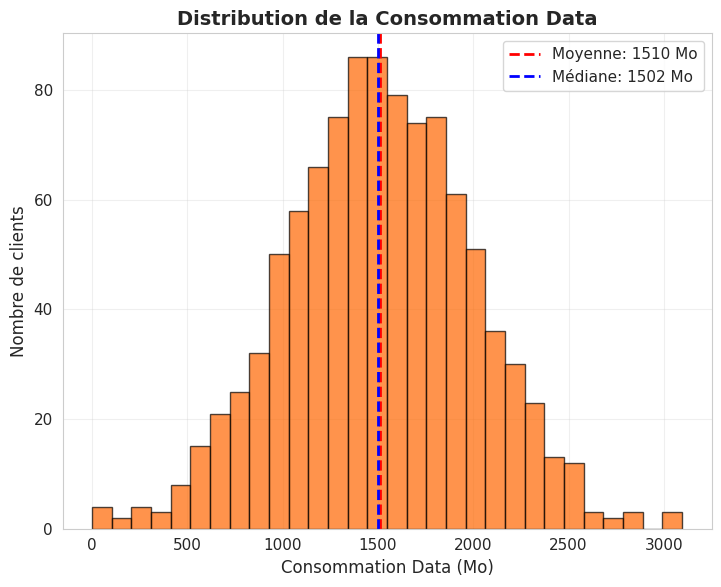

 INSIGHTS CONSOMMATION DATA :
• Consommation moyenne : 1510 Mo (1.5 Go)
• Consommation médiane : 1502 Mo
• Écart-type : 490 Mo
• Minimum : 0 Mo | Maximum : 3096 Mo
• Gros consommateurs (>P80) : 200 clients (20.0%)
• Faibles consommateurs (<P20) : 199 clients (19.9%)

VISUALISATION 2/4 : DISTRIBUTION MINUTES D'APPELS
--------------------------------------------------


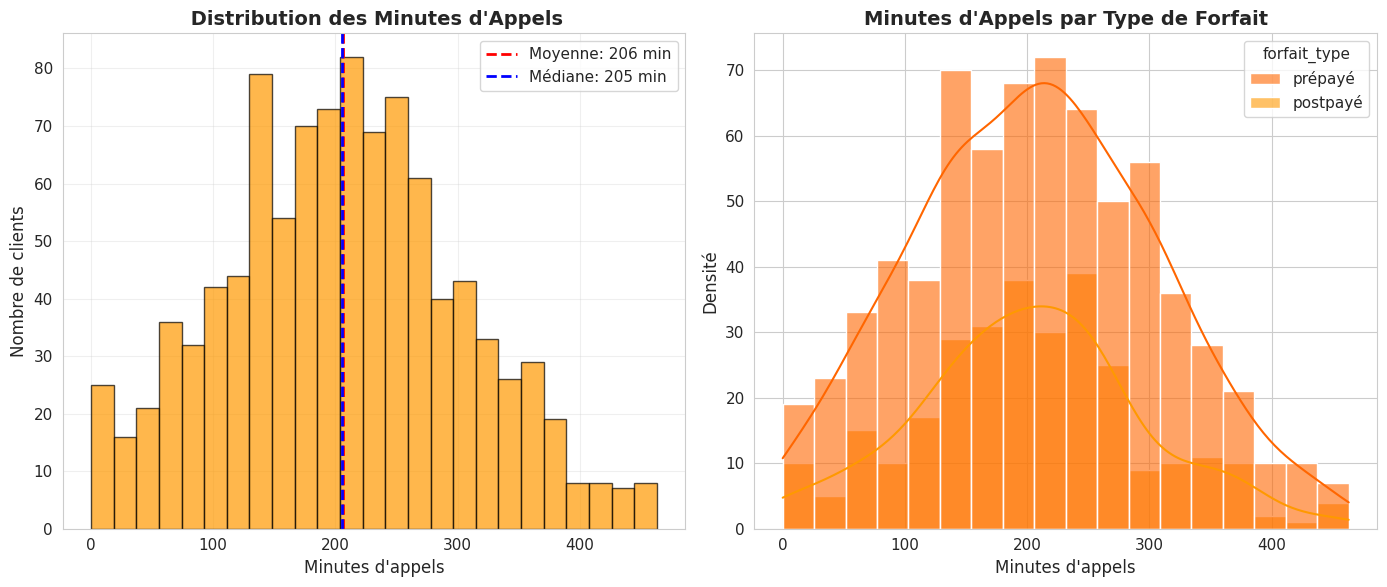

INSIGHTS MINUTES D'APPELS :
• Minutes moyennes : 206 min
• Minutes médianes : 205 min
• Prépayé : 207 min moyenne
• Postpayé : 202 min moyenne

 VISUALISATION 3/4 : BOXPLOT FACTURES PAR TYPE DE FORFAIT
--------------------------------------------------


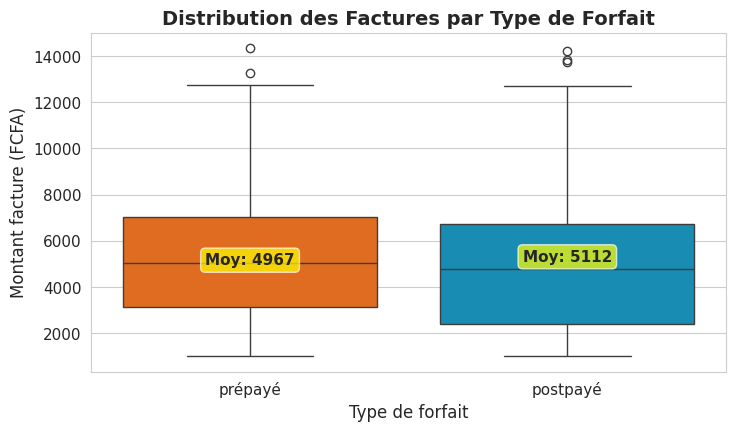

 INSIGHTS FACTURATION :
• PRÉPAYÉ : Moyenne 5112 FCFA | Médiane 5046 FCFA
• POSTPAYÉ : Moyenne 4967 FCFA | Médiane 4794 FCFA
• Différence moyenne : 146 FCFA (2.9%)
  INSIGHT BUSINESS : Prépayés paient plus cher que postpayés !
 RECOMMANDATION : Migrer les prépayés vers postpayé pour optimiser leur facture

 VISUALISATION 4/4 : RÉPARTITION GÉOGRAPHIQUE
--------------------------------------------------


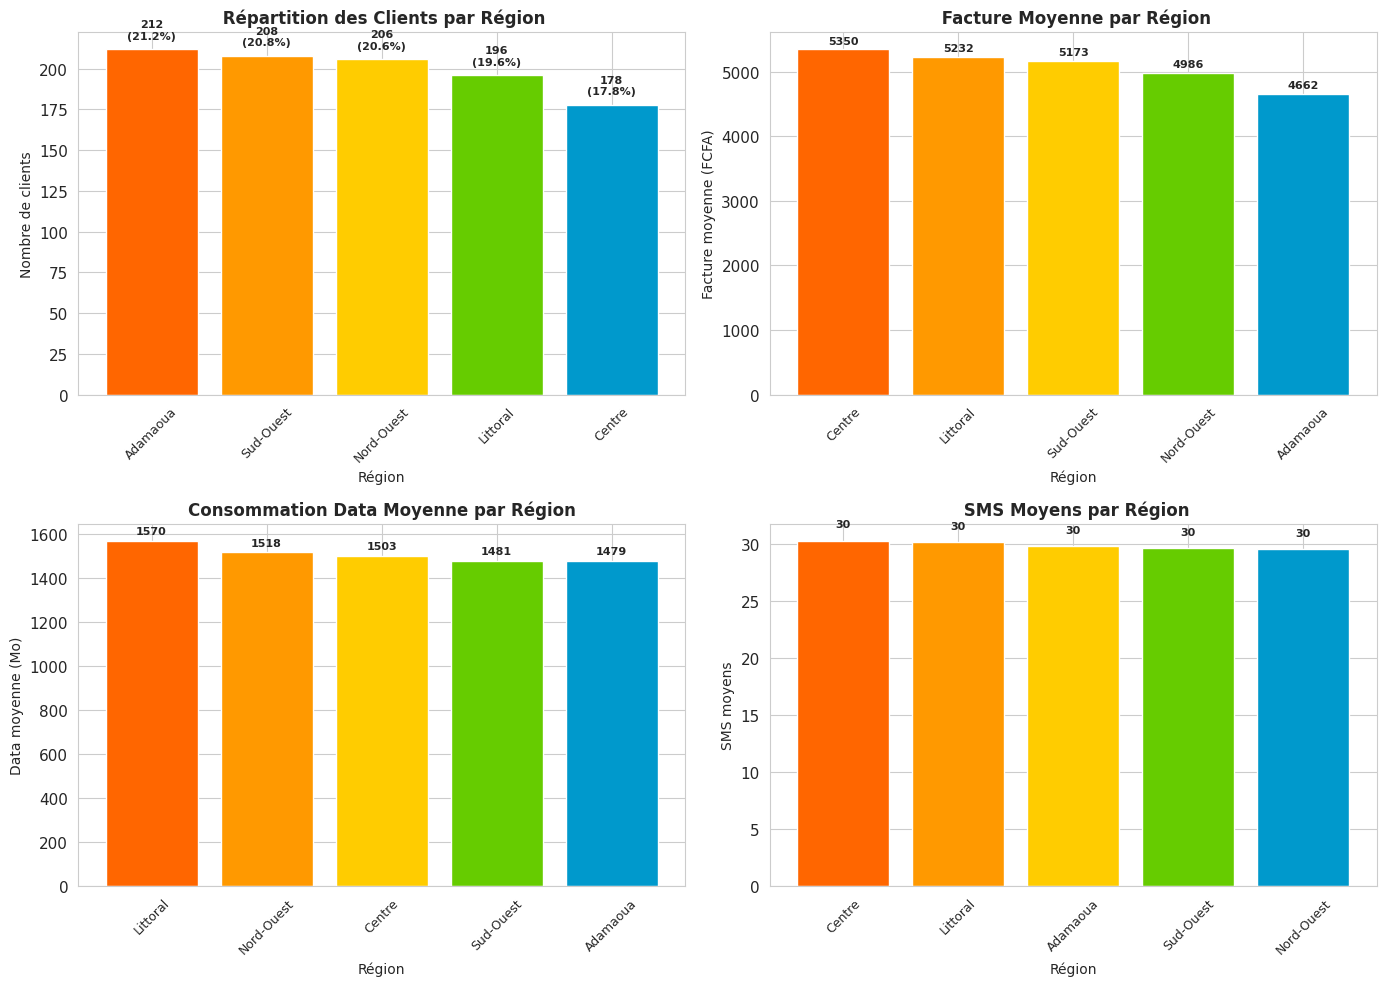

 INSIGHTS GÉOGRAPHIQUES :
• Région dominante : Adamaoua (212 clients, 21.2%)
• Région la moins représentée : Centre (178 clients)
• Région la plus rentable : Centre (5350 FCFA/client)
• Région la moins rentable : Adamaoua (4662 FCFA/client)


In [50]:
# Configuration optimisée pour Colab
plt.style.use('default')
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Palette couleurs Orange
orange_colors = ['#FF6600', '#FF9900', '#FFCC00', '#66CC00', '#0099CC']
sns.set_palette(orange_colors)


# VISUALISATION 1 : HISTOGRAMME CONSOMMATION DATA

print("VISUALISATION 1/4 : DISTRIBUTION CONSOMMATION DATA")
print("-"*50)

plt.figure(figsize=(14, 6))

# Subplot 1 : Histogramme simple
plt.subplot(1, 2, 1)
plt.hist(df['data_mo'], bins=30, color='#FF6600', alpha=0.7, edgecolor='black')
plt.title('Distribution de la Consommation Data', fontsize=14, fontweight='bold')
plt.xlabel('Consommation Data (Mo)', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajout de lignes statistiques
mean_data = df['data_mo'].mean()
median_data = df['data_mo'].median()
plt.axvline(mean_data, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_data:.0f} Mo')
plt.axvline(median_data, color='blue', linestyle='--', linewidth=2, label=f'Médiane: {median_data:.0f} Mo')
plt.legend()

plt.tight_layout()
plt.show()

# Insights
print(" INSIGHTS CONSOMMATION DATA :")
print(f"• Consommation moyenne : {df['data_mo'].mean():.0f} Mo ({df['data_mo'].mean()/1024:.1f} Go)")
print(f"• Consommation médiane : {df['data_mo'].median():.0f} Mo")
print(f"• Écart-type : {df['data_mo'].std():.0f} Mo")
print(f"• Minimum : {df['data_mo'].min():.0f} Mo | Maximum : {df['data_mo'].max():.0f} Mo")

# Analyse par segments
heavy_users = df[df['data_mo'] > df['data_mo'].quantile(0.8)]
light_users = df[df['data_mo'] < df['data_mo'].quantile(0.2)]
print(f"• Gros consommateurs (>P80) : {len(heavy_users)} clients ({len(heavy_users)/len(df)*100:.1f}%)")
print(f"• Faibles consommateurs (<P20) : {len(light_users)} clients ({len(light_users)/len(df)*100:.1f}%)")

# VISUALISATION 2 : HISTOGRAMME MINUTES D'APPELS

print("\nVISUALISATION 2/4 : DISTRIBUTION MINUTES D'APPELS")
print("-"*50)

plt.figure(figsize=(14, 6))

# Subplot 1 : Histogramme classique
plt.subplot(1, 2, 1)
plt.hist(df['appels_min'], bins=25, color='#FF9900', alpha=0.7, edgecolor='black')
plt.title(' Distribution des Minutes d\'Appels', fontsize=14, fontweight='bold')
plt.xlabel('Minutes d\'appels', fontsize=12)
plt.ylabel('Nombre de clients', fontsize=12)
plt.grid(True, alpha=0.3)

# Statistiques
mean_appels = df['appels_min'].mean()
median_appels = df['appels_min'].median()
plt.axvline(mean_appels, color='red', linestyle='--', linewidth=2, label=f'Moyenne: {mean_appels:.0f} min')
plt.axvline(median_appels, color='blue', linestyle='--', linewidth=2, label=f'Médiane: {median_appels:.0f} min')
plt.legend()

# Subplot 2 : Comparaison par type de forfait
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='appels_min', hue='forfait_type', alpha=0.6, kde=True)
plt.title('Minutes d\'Appels par Type de Forfait', fontsize=14, fontweight='bold')
plt.xlabel('Minutes d\'appels', fontsize=12)
plt.ylabel('Densité', fontsize=12)

plt.tight_layout()
plt.show()

# Insights appels
print("INSIGHTS MINUTES D'APPELS :")
print(f"• Minutes moyennes : {df['appels_min'].mean():.0f} min")
print(f"• Minutes médianes : {df['appels_min'].median():.0f} min")

# Comparaison forfaits
prepaye_appels = df[df['forfait_type'] == 'prépayé']['appels_min'].mean()
postpaye_appels = df[df['forfait_type'] == 'postpayé']['appels_min'].mean()
print(f"• Prépayé : {prepaye_appels:.0f} min moyenne")
print(f"• Postpayé : {postpaye_appels:.0f} min moyenne")

if postpaye_appels > prepaye_appels:
    print(f"• Postpayés appellent {((postpaye_appels/prepaye_appels - 1)*100):.1f}% plus que prépayés")

# VISUALISATION 3 : BOXPLOT FACTURES PAR FORFAIT

print("\n VISUALISATION 3/4 : BOXPLOT FACTURES PAR TYPE DE FORFAIT")
print("-"*50)

plt.figure(figsize=(14, 8))

# Subplot 1 : Boxplot principal
plt.subplot(2, 2, 1)
box_plot = sns.boxplot(data=df, x='forfait_type', y='montant_facture', palette=['#FF6600', '#0099CC'])
plt.title('Distribution des Factures par Type de Forfait', fontsize=14, fontweight='bold')
plt.xlabel('Type de forfait', fontsize=12)
plt.ylabel('Montant facture (FCFA)', fontsize=12)

# Ajout des moyennes sur le boxplot
means = df.groupby('forfait_type')['montant_facture'].mean()
for i, (forfait, mean_val) in enumerate(means.items()):
    plt.text(i, mean_val, f'Moy: {mean_val:.0f}',
             horizontalalignment='center', fontweight='bold',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))


plt.tight_layout()
plt.show()

# Insights factures
print(" INSIGHTS FACTURATION :")
prepaye_stats = df[df['forfait_type'] == 'prépayé']['montant_facture']
postpaye_stats = df[df['forfait_type'] == 'postpayé']['montant_facture']

print(f"• PRÉPAYÉ : Moyenne {prepaye_stats.mean():.0f} FCFA | Médiane {prepaye_stats.median():.0f} FCFA")
print(f"• POSTPAYÉ : Moyenne {postpaye_stats.mean():.0f} FCFA | Médiane {postpaye_stats.median():.0f} FCFA")

diff_moyenne = prepaye_stats.mean() - postpaye_stats.mean()
print(f"• Différence moyenne : {diff_moyenne:.0f} FCFA ({diff_moyenne/postpaye_stats.mean()*100:.1f}%)")

if diff_moyenne > 0:
    print("  INSIGHT BUSINESS : Prépayés paient plus cher que postpayés !")
    print(" RECOMMANDATION : Migrer les prépayés vers postpayé pour optimiser leur facture")

# VISUALISATION 4 : RÉPARTITION GÉOGRAPHIQUE

print("\n VISUALISATION 4/4 : RÉPARTITION GÉOGRAPHIQUE")
print("-"*50)

# SOLUTION 1 : Figure plus compacte avec meilleur espacement
plt.figure(figsize=(14, 10))  # Réduction largeur, augmentation hauteur

# Ajustement des espaces entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3, top=0.95, bottom=0.1)

# Subplot 1 : Bar chart principal
plt.subplot(2, 2, 1)
region_counts = df['region'].value_counts()
bars = plt.bar(region_counts.index, region_counts.values,
               color=['#FF6600', '#FF9900', '#FFCC00', '#66CC00', '#0099CC'])
plt.title(' Répartition des Clients par Région', fontsize=12, fontweight='bold')
plt.xlabel('Région', fontsize=10)
plt.ylabel('Nombre de clients', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Ajout des pourcentages sur les barres
total_clients = len(df)
for bar, count in zip(bars, region_counts.values):
    percentage = (count / total_clients) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{count}\n({percentage:.1f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=8)

# Subplot 2 : Facture moyenne par région
plt.subplot(2, 2, 2)
region_facture = df.groupby('region')['montant_facture'].mean().sort_values(ascending=False)
bars2 = plt.bar(region_facture.index, region_facture.values,
                color=['#FF6600', '#FF9900', '#FFCC00', '#66CC00', '#0099CC'])
plt.title(' Facture Moyenne par Région', fontsize=12, fontweight='bold')
plt.xlabel('Région', fontsize=10)
plt.ylabel('Facture moyenne (FCFA)', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Ajout des valeurs sur les barres
for bar, value in zip(bars2, region_facture.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
             f'{value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Subplot 3 : Consommation data par région
plt.subplot(2, 2, 3)
region_data = df.groupby('region')['data_mo'].mean().sort_values(ascending=False)
bars3 = plt.bar(region_data.index, region_data.values,
                color=['#FF6600', '#FF9900', '#FFCC00', '#66CC00', '#0099CC'])
plt.title('Consommation Data Moyenne par Région', fontsize=12, fontweight='bold')
plt.xlabel('Région', fontsize=10)
plt.ylabel('Data moyenne (Mo)', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Ajout des valeurs
for bar, value in zip(bars3, region_data.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
             f'{value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Subplot 4 : SMS moyens par région
plt.subplot(2, 2, 4)
region_sms = df.groupby('region')['sms_envoyes'].mean().sort_values(ascending=False)
bars4 = plt.bar(region_sms.index, region_sms.values,
                color=['#FF6600', '#FF9900', '#FFCC00', '#66CC00', '#0099CC'])
plt.title(' SMS Moyens par Région', fontsize=12, fontweight='bold')
plt.xlabel('Région', fontsize=10)
plt.ylabel('SMS moyens', fontsize=10)
plt.xticks(rotation=45, fontsize=9)

# Ajout des valeurs sur les barres
for bar, value in zip(bars4, region_sms.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{value:.0f}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# Application du layout optimisé
plt.tight_layout()
plt.show()

# Insights géographiques (inchangés)
print(" INSIGHTS GÉOGRAPHIQUES :")
print(f"• Région dominante : {region_counts.index[0]} ({region_counts.iloc[0]} clients, {region_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"• Région la moins représentée : {region_counts.index[-1]} ({region_counts.iloc[-1]} clients)")

# Région la plus rentable
most_profitable = region_facture.index[0]
least_profitable = region_facture.index[-1]
print(f"• Région la plus rentable : {most_profitable} ({region_facture.iloc[0]:.0f} FCFA/client)")
print(f"• Région la moins rentable : {least_profitable} ({region_facture.iloc[-1]:.0f} FCFA/client)")

## ⚙️ Préparation des données pour le clustering

In [51]:
print(" PRÉPARATION DES DONNÉES")
print("-"*25)

# Sélection des variables pour clustering
features = ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture']
X = df[features]

print(f" Variables sélectionnées : {features}")
print(f" Dataset : {X.shape[0]} clients × {X.shape[1]} variables")

print(f"\n STANDARDISATION")
print("-"*15)

# Standardisation avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Standardisation réussie")
print("Données centrées (moyenne=0) et réduites (écart-type=1)")

# Vérification rapide
import pandas as pd
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(f"Moyennes après standardisation : {X_scaled_df.mean().round(2).tolist()}")



 PRÉPARATION DES DONNÉES
-------------------------
 Variables sélectionnées : ['age', 'appels_min', 'data_mo', 'sms_envoyes', 'montant_facture']
 Dataset : 1000 clients × 5 variables

 STANDARDISATION
---------------
Standardisation réussie
Données centrées (moyenne=0) et réduites (écart-type=1)
Moyennes après standardisation : [-0.0, -0.0, -0.0, 0.0, -0.0]


## 📌 Clustering des clients (KMeans)

In [52]:
# Application KMeans avec k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['cluster'] = clusters

print(" Clustering réalisé avec k=4")

# Répartition des clusters
cluster_counts = pd.Series(clusters).value_counts().sort_index()
print(f"\nRÉPARTITION DES CLUSTERS :")
for cluster_id, count in cluster_counts.items():
    percentage = (count / len(df)) * 100
    print(f"• Cluster {cluster_id} : {count} clients ({percentage:.1f}%)")


 Clustering réalisé avec k=4

RÉPARTITION DES CLUSTERS :
• Cluster 0 : 257 clients (25.7%)
• Cluster 1 : 271 clients (27.1%)
• Cluster 2 : 202 clients (20.2%)
• Cluster 3 : 270 clients (27.0%)


## 🌀 Visualisation des clusters avec PCA


 VISUALISATION PCA
-----------------
 Variance expliquée : PC1=21.6%, PC2=20.6%
 Total variance conservée : 42.2%


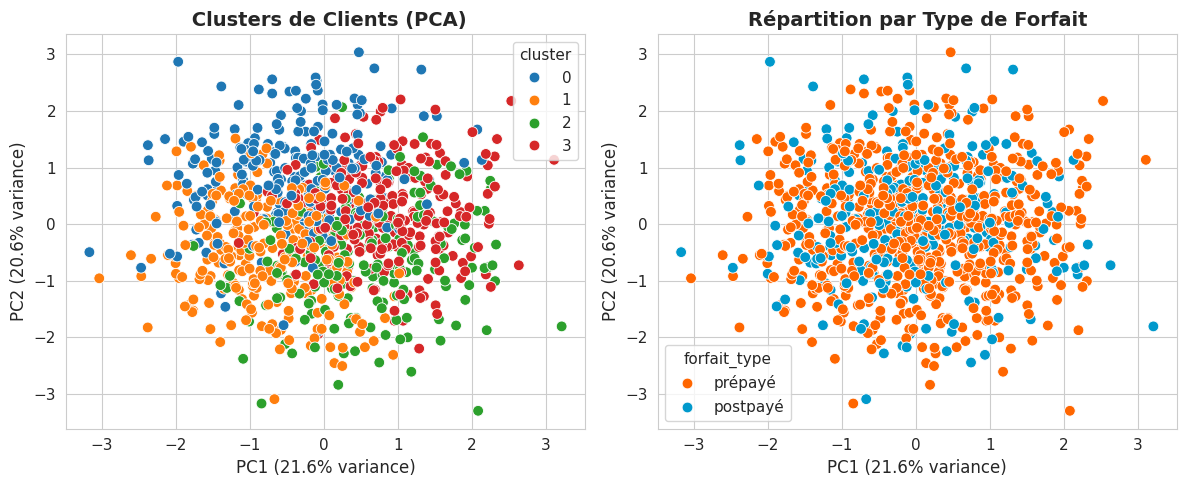

In [53]:
print(f"\n VISUALISATION PCA")
print("-"*17)

# Application PCA pour réduction en 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

# Variance expliquée
variance_ratio = pca.explained_variance_ratio_
print(f" Variance expliquée : PC1={variance_ratio[0]:.1%}, PC2={variance_ratio[1]:.1%}")
print(f" Total variance conservée : {variance_ratio.sum():.1%}")

# Visualisation des clusters
plt.figure(figsize=(12, 5))

# Graphique principal
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10', s=60)
plt.title(' Clusters de Clients (PCA)', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({variance_ratio[0]:.1%} variance)')
plt.ylabel(f'PC2 ({variance_ratio[1]:.1%} variance)')

# Graphique bonus : par type de forfait
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='pca1', y='pca2', hue='forfait_type', palette=['#FF6600', '#0099CC'], s=60)
plt.title('Répartition par Type de Forfait', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({variance_ratio[0]:.1%} variance)')
plt.ylabel(f'PC2 ({variance_ratio[1]:.1%} variance)')

plt.tight_layout()
plt.show()



In [54]:
#  ÉTAPE 5 : ANALYSE SIMPLE DES PROFILS

print(f"\n PROFILS DES CLUSTERS")
print("-"*22)

# Calcul des moyennes par cluster
cluster_profiles = df.groupby('cluster')[features].mean().round(0)

print(" PROFILS MOYENS PAR CLUSTER :")
print(cluster_profiles)

# Analyse rapide cluster par cluster
print(f"\n ANALYSE RAPIDE :")
moyennes_globales = df[features].mean()

for cluster_id in range(4):
    cluster_data = df[df['cluster'] == cluster_id]
    size = len(cluster_data)

    # Caractéristiques principales
    age_moy = cluster_data['age'].mean()
    data_moy = cluster_data['data_mo'].mean()
    facture_moy = cluster_data['montant_facture'].mean()

    print(f"\n• CLUSTER {cluster_id} ({size} clients) :")
    print(f"  - Âge moyen : {age_moy:.0f} ans")
    print(f"  - Data moyenne : {data_moy:.0f} Mo")
    print(f"  - Facture moyenne : {facture_moy:.0f} FCFA")

    # Classification simple
    if data_moy > moyennes_globales['data_mo'] and facture_moy > moyennes_globales['montant_facture']:
        segment_type = "PREMIUM (forte conso + forte facture)"
    elif data_moy > moyennes_globales['data_mo'] and facture_moy < moyennes_globales['montant_facture']:
        segment_type = "OPPORTUNITÉ (forte conso + faible facture)"
    elif data_moy < moyennes_globales['data_mo'] and facture_moy > moyennes_globales['montant_facture']:
        segment_type = "À RISQUE (faible conso + forte facture)"
    else:
        segment_type = "STANDARD (consommation équilibrée)"

    print(f"  → {segment_type}")


 PROFILS DES CLUSTERS
----------------------
 PROFILS MOYENS PAR CLUSTER :
          age  appels_min  data_mo  sms_envoyes  montant_facture
cluster                                                         
0        47.0       121.0   1903.0         30.0           5820.0
1        28.0       233.0   1516.0         27.0           4759.0
2        43.0       204.0   1040.0         34.0           6471.0
3        57.0       261.0   1481.0         29.0           3616.0

 ANALYSE RAPIDE :

• CLUSTER 0 (257 clients) :
  - Âge moyen : 47 ans
  - Data moyenne : 1903 Mo
  - Facture moyenne : 5820 FCFA
  → PREMIUM (forte conso + forte facture)

• CLUSTER 1 (271 clients) :
  - Âge moyen : 28 ans
  - Data moyenne : 1516 Mo
  - Facture moyenne : 4759 FCFA
  → OPPORTUNITÉ (forte conso + faible facture)

• CLUSTER 2 (202 clients) :
  - Âge moyen : 43 ans
  - Data moyenne : 1040 Mo
  - Facture moyenne : 6471 FCFA
  → À RISQUE (faible conso + forte facture)

• CLUSTER 3 (270 clients) :
  - Âge moyen : 57 a

## 💡 Recommandations stratégiques

In [55]:
#  PHASE 4 : RECOMMANDATIONS STRATÉGIQUES

# Recommandations ciblées selon les critères spécifiques

print(" RECOMMANDATIONS STRATÉGIQUES ")

#  IDENTIFIER LES PROFILS À FORT POTENTIEL

print("1. IDENTIFICATION DES PROFILS À FORT POTENTIEL")
print("-"*50)

# Moyennes de référence
data_moyenne = df['data_mo'].mean()
facture_moyenne = df['montant_facture'].mean()
sms_moyenne = df['sms_envoyes'].mean()

print(f" RÉFÉRENCES GLOBALES :")
print(f"• Data moyenne : {data_moyenne:.0f} Mo")
print(f"• Facture moyenne : {facture_moyenne:.0f} FCFA")
print(f"• SMS moyenne : {sms_moyenne:.0f} messages")

# Analyse des profils à fort potentiel par cluster
profils_potentiel = []

print(f"\n ANALYSE PAR CLUSTER :")

for cluster_id in range(4):
    cluster_data = df[df['cluster'] == cluster_id]
    size = len(cluster_data)

    # Moyennes du cluster
    data_moy = cluster_data['data_mo'].mean()
    facture_moy = cluster_data['montant_facture'].mean()
    sms_moy = cluster_data['sms_envoyes'].mean()
    prepaye_pct = (cluster_data['forfait_type'] == 'prépayé').mean() * 100

    print(f"\nCLUSTER {cluster_id} ({size} clients) :")
    print(f"• Data moyenne : {data_moy:.0f} Mo ({data_moy/data_moyenne:.1f}x la moyenne)")
    print(f"• Facture moyenne : {facture_moy:.0f} FCFA ({facture_moy/facture_moyenne:.1f}x la moyenne)")
    print(f"• SMS moyenne : {sms_moy:.0f} messages ({sms_moy/sms_moyenne:.1f}x la moyenne)")
    print(f"• % Prépayés : {prepaye_pct:.0f}%")

    # CRITÈRE 1 : Fort usage data avec petit forfait
    if data_moy > data_moyenne and facture_moy < facture_moyenne:
        potentiel = " TRÈS ÉLEVÉ - Fort usage data, petit forfait"
        action_principale = "UPSELLING URGENT"
        profils_potentiel.append({
            'cluster': cluster_id,
            'type': 'forte_conso_faible_facture',
            'taille': size,
            'potentiel': 'TRÈS ÉLEVÉ',
            'data_ratio': data_moy/data_moyenne,
            'facture_ratio': facture_moy/facture_moyenne
        })
    elif data_moy > data_moyenne * 1.2:
        potentiel = " ÉLEVÉ - Gros consommateur data"
        action_principale = "FIDÉLISATION + SERVICES PREMIUM"
    elif sms_moy > sms_moyenne * 1.5:
        potentiel = "MOYEN - Intensif SMS"
        action_principale = "OFFRES SMS PERSONNALISÉES"
    elif prepaye_pct > 70 and facture_moy > facture_moyenne:
        potentiel = " MOYEN - Prépayés chers"
        action_principale = "MIGRATION POSTPAYÉ"
    else:
        potentiel = " STANDARD - Profil équilibré"
        action_principale = "MAINTIEN"

    print(f" Potentiel : {potentiel}")
    print(f" Action : {action_principale}")

# GROUPES FORTE CONSOMMATION DATA + FAIBLE FACTURE


print(f"\n 2. GROUPES FORTE CONSOMMATION DATA + FAIBLE FACTURE")
print("-"*55)

# Identification précise des clients cibles
clients_cibles = df[(df['data_mo'] > data_moyenne) & (df['montant_facture'] < facture_moyenne)]
nb_clients_cibles = len(clients_cibles)
pct_clients_cibles = (nb_clients_cibles / len(df)) * 100

print(f" CLIENTS CIBLES IDENTIFIÉS :")
print(f"• Nombre : {nb_clients_cibles} clients ({pct_clients_cibles:.1f}% du total)")
print(f"• Critère : Data > {data_moyenne:.0f} Mo ET Facture < {facture_moyenne:.0f} FCFA")

# Analyse par cluster de ces clients
print(f"\n RÉPARTITION PAR CLUSTER :")
for cluster_id in range(4):
    clients_cluster_cibles = clients_cibles[clients_cibles['cluster'] == cluster_id]
    nb_cluster = len(clients_cluster_cibles)
    if nb_cluster > 0:
        pct_cluster = (nb_cluster / nb_clients_cibles) * 100
        data_moy_cible = clients_cluster_cibles['data_mo'].mean()
        facture_moy_cible = clients_cluster_cibles['montant_facture'].mean()
        prepaye_cible = (clients_cluster_cibles['forfait_type'] == 'prépayé').mean() * 100

        print(f"• Cluster {cluster_id} : {nb_cluster} clients ({pct_cluster:.1f}% des cibles)")
        print(f"  - Data moyenne : {data_moy_cible:.0f} Mo")
        print(f"  - Facture moyenne : {facture_moy_cible:.0f} FCFA")
        print(f"  - % Prépayés : {prepaye_cible:.0f}%")

# Potentiel de revenus
facture_cible_optimale = data_moyenne * (facture_moyenne / data_moyenne) * 1.2  # Estimation
gain_unitaire_moyen = facture_cible_optimale - clients_cibles['montant_facture'].mean()
gain_total_potentiel = gain_unitaire_moyen * nb_clients_cibles

print(f"\n POTENTIEL REVENUS :")
print(f"• Gain unitaire moyen estimé : {gain_unitaire_moyen:.0f} FCFA/client")
print(f"• Gain total potentiel : {gain_total_potentiel:,.0f} FCFA")

#  OFFRES SMS PERSONNALISÉES

print(f"\n 3. OFFRES SMS PERSONNALISÉES")
print("-"*35)

# Identification des clients intensifs SMS
seuil_sms_intensif = sms_moyenne * 1.5
clients_sms_intensifs = df[df['sms_envoyes'] > seuil_sms_intensif]
nb_sms_intensifs = len(clients_sms_intensifs)

print(f" CLIENTS INTENSIFS SMS :")
print(f"• Seuil défini : > {seuil_sms_intensif:.0f} SMS/mois")
print(f"• Clients identifiés : {nb_sms_intensifs} ({nb_sms_intensifs/len(df)*100:.1f}%)")

# Profil des clients SMS intensifs
if nb_sms_intensifs > 0:
    sms_moy_intensifs = clients_sms_intensifs['sms_envoyes'].mean()
    age_moy_intensifs = clients_sms_intensifs['age'].mean()
    facture_moy_intensifs = clients_sms_intensifs['montant_facture'].mean()

    print(f"\n PROFIL CLIENTS SMS INTENSIFS :")
    print(f"• SMS moyenne : {sms_moy_intensifs:.0f} messages/mois")
    print(f"• Âge moyen : {age_moy_intensifs:.1f} ans")
    print(f"• Facture moyenne : {facture_moy_intensifs:.0f} FCFA")

    # Répartition par cluster
    print(f"\n RÉPARTITION PAR CLUSTER :")
    for cluster_id in range(4):
        sms_cluster = clients_sms_intensifs[clients_sms_intensifs['cluster'] == cluster_id]
        if len(sms_cluster) > 0:
            pct = (len(sms_cluster) / nb_sms_intensifs) * 100
            print(f"• Cluster {cluster_id} : {len(sms_cluster)} clients ({pct:.1f}%)")

# MIGRATIONS DE FORFAIT RECOMMANDÉES

print(f"\n4. MIGRATIONS DE FORFAIT RECOMMANDÉES")
print("-"*42)

# Analyse prépayé vs postpayé par cluster
print(f" ANALYSE PRÉPAYÉ vs POSTPAYÉ PAR CLUSTER :")

migrations_recommandees = []

for cluster_id in range(4):
    cluster_data = df[df['cluster'] == cluster_id]

    # Séparation prépayé/postpayé
    prepaye_data = cluster_data[cluster_data['forfait_type'] == 'prépayé']
    postpaye_data = cluster_data[cluster_data['forfait_type'] == 'postpayé']

    if len(prepaye_data) > 0 and len(postpaye_data) > 0:
        # Comparaison des profils
        data_prepaye = prepaye_data['data_mo'].mean()
        data_postpaye = postpaye_data['data_mo'].mean()
        facture_prepaye = prepaye_data['montant_facture'].mean()
        facture_postpaye = postpaye_data['montant_facture'].mean()

        print(f"\n CLUSTER {cluster_id} :")
        print(f"• Prépayé : {len(prepaye_data)} clients - {data_prepaye:.0f} Mo - {facture_prepaye:.0f} FCFA")
        print(f"• Postpayé : {len(postpaye_data)} clients - {data_postpaye:.0f} Mo - {facture_postpaye:.0f} FCFA")

        # Critères de migration prépayé → postpayé
        if data_prepaye > data_moyenne and len(prepaye_data) > 10:
            recommandation = "MIGRATION PRIORITAIRE"
            nb_candidats = len(prepaye_data[prepaye_data['data_mo'] > data_moyenne])
            migrations_recommandees.append({
                'cluster': cluster_id,
                'candidats': nb_candidats,
                'data_moyenne': data_prepaye,
                'gain_estime': (facture_postpaye - facture_prepaye) * nb_candidats
            })
        elif facture_prepaye > facture_postpaye * 1.1:
            recommandation = " MIGRATION BÉNÉFIQUE"
            nb_candidats = len(prepaye_data)
        else:
            recommandation = " MAINTIEN ACTUEL"
            nb_candidats = 0

        print(f" Recommandation : {recommandation}")
        if nb_candidats > 0:
            print(f" Candidats migration : {nb_candidats} clients")

# Résumé des migrations
if migrations_recommandees:
    print(f"\n RÉSUMÉ MIGRATIONS PRÉPAYÉ → POSTPAYÉ :")
    total_candidats = sum(m['candidats'] for m in migrations_recommandees)
    total_gain = sum(m['gain_estime'] for m in migrations_recommandees)
    print(f"• Total candidats : {total_candidats} clients")
    print(f"• Gain estimé : {total_gain:,.0f} FCFA/mois")

#  ACTIONS MARKETING CIBLÉES

print(f"\n 5. ACTIONS MARKETING CIBLÉES")
print("-"*32)

print(f" CAMPAGNES RECOMMANDÉES PAR PROFIL :")

# Action 1 : Upselling data
if profils_potentiel:
    cluster_upselling = [p for p in profils_potentiel if p['type'] == 'forte_conso_faible_facture']
    if cluster_upselling:
        cluster_id = cluster_upselling[0]['cluster']
        nb_clients = cluster_upselling[0]['taille']
        print(f"\n CAMPAGNE UPSELLING DATA :")
        print(f"• Cible : Cluster {cluster_id} ({nb_clients} clients)")
        print(f"• Message : 'Vous consommez {cluster_upselling[0]['data_ratio']:.1f}x la moyenne !'")
        print(f"• Offre : Forfait data illimitée +{gain_unitaire_moyen:.0f} FCFA")
        print(f"• Canal : SMS + Email + Appel commercial")

# Action 2 : Bonus SMS
if nb_sms_intensifs > 0:
    print(f"\n CAMPAGNE SMS PERSONNALISÉE :")
    print(f"• Cible : {nb_sms_intensifs} clients intensifs SMS")
    print(f"• Offre : +50% SMS gratuits pendant 3 mois")
    print(f"• Message : 'SMS illimités pour les grands communicants !'")
    print(f"• Canal : Notification in-app + SMS")

# Action 3 : Migration prépayé
if migrations_recommandees:
    print(f"\n CAMPAGNE MIGRATION POSTPAYÉ :")
    print(f"• Cible : {total_candidats} clients prépayés gros consommateurs")
    print(f"• Offre : Migration gratuite + 1 mois offert")
    print(f"• Message : 'Passez au postpayé et économisez !'")
    print(f"• Canal : Centre d'appels + Boutiques")

# Action 4 : Fidélisation premium
clients_premium = df[(df['data_mo'] > data_moyenne * 1.2) & (df['montant_facture'] > facture_moyenne * 1.1)]
if len(clients_premium) > 0:
    print(f"\n PROGRAMME FIDÉLITÉ VIP :")
    print(f"• Cible : {len(clients_premium)} clients premium")
    print(f"• Offre : Accès prioritaire + Services exclusifs")
    print(f"• Message : 'Bienvenue dans le club Orange VIP !'")
    print(f"• Canal : Email personnalisé + Courrier")

# RÉSUMÉ DES RECOMMANDATIONS

print(" RÉSUMÉ  - RECOMMANDATIONS ORANGE")

print(f" PROFILS À FORT POTENTIEL IDENTIFIÉS :")
print(f"• {nb_clients_cibles} clients forte conso data + faible facture ({pct_clients_cibles:.1f}%)")
print(f"• Gain potentiel : {gain_total_potentiel:,.0f} FCFA")

print(f"\n ACTIONS MARKETING PRIORITAIRES :")
print(f"1. UPSELLING DATA : {nb_clients_cibles} clients cibles")
print(f"2. OFFRES SMS : {nb_sms_intensifs} clients intensifs")
print(f"3. MIGRATION PRÉPAYÉ→POSTPAYÉ : {total_candidats if migrations_recommandees else 0} candidats")
print(f"4. FIDÉLISATION PREMIUM : {len(clients_premium)} clients VIP")

print(f"\n IMPACT BUSINESS ESTIMÉ :")
impact_total = gain_total_potentiel + (total_gain if migrations_recommandees else 0)
print(f"• Gain mensuel total : {impact_total:,.0f} FCFA")
print(f"• ROI campagnes : Très élevé (clients déjà engagés)")

print(f"\n MISE EN ŒUVRE :")
print(f"• Prioriser clusters forte conso/faible facture")
print(f"• Déployer offres personnalisées par profil")
print(f"• Suivre taux migration et satisfaction")



 RECOMMANDATIONS STRATÉGIQUES 
1. IDENTIFICATION DES PROFILS À FORT POTENTIEL
--------------------------------------------------
 RÉFÉRENCES GLOBALES :
• Data moyenne : 1510 Mo
• Facture moyenne : 5069 FCFA
• SMS moyenne : 30 messages

 ANALYSE PAR CLUSTER :

CLUSTER 0 (257 clients) :
• Data moyenne : 1903 Mo (1.3x la moyenne)
• Facture moyenne : 5820 FCFA (1.1x la moyenne)
• SMS moyenne : 30 messages (1.0x la moyenne)
• % Prépayés : 71%
 Potentiel :  ÉLEVÉ - Gros consommateur data
 Action : FIDÉLISATION + SERVICES PREMIUM

CLUSTER 1 (271 clients) :
• Data moyenne : 1516 Mo (1.0x la moyenne)
• Facture moyenne : 4759 FCFA (0.9x la moyenne)
• SMS moyenne : 27 messages (0.9x la moyenne)
• % Prépayés : 71%
 Potentiel :  TRÈS ÉLEVÉ - Fort usage data, petit forfait
 Action : UPSELLING URGENT

CLUSTER 2 (202 clients) :
• Data moyenne : 1040 Mo (0.7x la moyenne)
• Facture moyenne : 6471 FCFA (1.3x la moyenne)
• SMS moyenne : 34 messages (1.1x la moyenne)
• % Prépayés : 74%
 Potentiel :  MOYEN 


- Identifier les groupes de clients à forte consommation data et faible facture
- Proposer des migrations de forfait pour certains clusters
- Créer des offres SMS personnalisées pour les clients intensifs en messages
